# Read data
Our data set is stored at **/data7/users/deandres/newML2** . It contains X-ray , Sunyaev–Zeldovich, Optical (Stars) and DM maps. The objective of this notebook is to show how to read the data and efficiently save it  for further preprocessing.

In [5]:
path = "/data7/users/deandres/newML2/"

In [4]:
RAs = np.arange(0,29)
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from utils import plot_cluster

def read_xr(lp,hid,RA):
    region = 'X-ray/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-Athena-wfi-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def read_sz(lp,hid,RA):
    region = 'SZ/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-TT-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def read_dm(lp,hid,RA):
    region = 'DM/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

In [54]:
lp=1
region = 'DM/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
s = str(hid)[:3]
file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
print(RA)
data = fits.getdata(path+region+file)
hdul = fits.open(path+region+file)
hdul[0].header


0


SIMPLE  = 'T       '           / conforms to FITS standard                      
BITPIX  =                  -64 / 32 bit floating point                          
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  640                                                  
NAXIS2  =                  640                                                  
EXTEND  =                    T / Extensions may be present                      
RADECSYS= 'ICRS    '           / International Celestial Ref. System            
CTYPE1  = 'RA---TAN'           / Coordinate type                                
CTYPE2  = 'DEC--TAN'           / Coordinate type                                
CUNIT1  = 'deg     '           / Units                                          
CUNIT2  = 'deg     '           / Units                                          
CD1_2   =                  0.0 / RA deg per row pixel                           
CD2_1   =                  0

In [50]:
def get_M(lp,hid,RA):
    region = 'DM/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    hdul = fits.open(path+region+file)
    M = np.float(hdul[0].header[-2][12:18])
    return M


In [42]:
M

array([15.325, 15.352, 14.689, ..., 14.788, 13.953, 14.802])

In [3]:
lp = 1
hid = 123000000000001

In [4]:
RAs = np.arange(29)

In [31]:
indices = []
width, height = dm.shape
x1 = 320
y1 = 320
radiusSquared = 1**2
for x in range(width):
    for y in range(height):
        dx = x - x1
        dy = y - y1
        distanceSquared = dx*dx+dy*dy
        if (distanceSquared <= radiusSquared):
            indices.append((x,y))

def indices_inside(radius):
    radiusSquared = radius**2 
    indices = []
    width, height = dm.shape
    x1 = 320
    y1 = 320
    for x in range(width):
        for y in range(height):
            dx = x - x1
            dy = y - y1
            distanceSquared = dx*dx+dy*dy
            if (distanceSquared <= radiusSquared):
                indices.append((x,y))
                
    return indices            

In [ ]:
def indices_inside(pos,r,center = (0,0,0)):
    radiusSquared = radius**2 
    
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    
    mask = np.where((x**2+y**2+z**2)<r**2)
                
    return mask

In [33]:
indices = indices_inside(2)
indices

[(318, 320),
 (319, 319),
 (319, 320),
 (319, 321),
 (320, 318),
 (320, 319),
 (320, 320),
 (320, 321),
 (320, 322),
 (321, 319),
 (321, 320),
 (321, 321),
 (322, 320)]

In [40]:
indices = indices_inside(1)
suma = 0
for i in indices:
    suma = suma + dm[i]
    
suma    

637.0

In [163]:
np.log10(mass_profile*0.12691148*1e10)[-1]

15.407958906292745

In [176]:
Msum=np.log10(np.sum(dm)*0.12691148*1e10)

In [180]:
Msum = 10**Msum
M = 10**M

In [184]:
np.log10(Msum)

15.407958906292745

In [190]:
sz=read_sz(lp,hid,RA)

1


In [198]:
np.log10(dm.sum())

7.805127489907104

In [ ]:
lp = 1
hid = 128000000000001
M = get_M(lp,hid,RA)
fig = plt.figure(figsize=(10,6))
RAs = np.arange(29)
for RA in RAs:
    dm = read_xr(lp,hid,RA)
    rads = np.arange(0,640,22)
    mass_profile = np.empty((len(rads),))

    j = 0

    for r in rads: 
        suma = 0
        indices = indices_inside(r)
        for i in indices:
            suma = suma + dm[i]
        mass_profile[j] = suma 
        j+=1
    
    
    plt.plot(np.arange(0,30)/29,np.log10(mass_profile))

plt.plot()    
#plt.plot([0,1],[M,M],'r--')
plt.xlabel(r'$r/R_{200}$',fontsize=15)
plt.ylabel(r' log integrated x ray number of photons',fontsize=15)
plt.xticks()
#plt.xscale('log')
plt.show()    

28
0
1
2
3
4


In [ ]:
fig = plt.figure(figsize=(10,6))
plt.plot(np.arange(0,30)/29,np.log10(mass_profile*0.12691148*1e10))
plt.xlabel(r'$r/R_{200}$',fontsize=15)
plt.ylabel(r'log $M/M_{sun}$',fontsize=15)
plt.xticks()
plt.show()

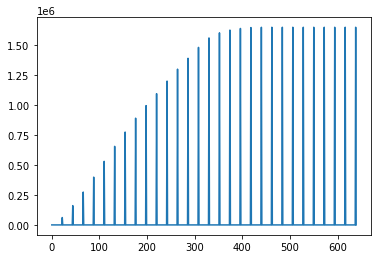

In [79]:
plt.plot(mass_profile)

In [81]:
rads.shape

(30,)

In [25]:
plot_cluster(dm)
def circle_points(r,thetha):
    x = 320+int(r*np.cos(theta))
    y = 320+int(r*np.sen(theta))
    return x,y
def disk_points(r)
    pi =

SyntaxError: invalid syntax (<ipython-input-25-6c702599eded>, line 6)

In [53]:
lp=1
for RA in RAs:
    dm = read_dm(lp,hid,RA)
    Xray = read_xr(lp,hid,RA)
    SZ = read_sz(lp,hid,RA)
    plot_cluster(dm)
    plot_cluster(Xray)
    plot_cluster(SZ)

NameError: name 'hid' is not defined

In [7]:
### how many haloes there are?
from os import walk
import numpy as np

f = []
regionID =[] 
cluster = '/NewMDCLUSTER_{}'
for i in range(1,325):
    mypath=path+"DM/"+cluster.format(str(i).zfill(4))

    #print(mypath)
    for (dirpath, dirnames, filenames) in walk(mypath):
        f.extend(sorted(filenames))
        regionID.append(i*np.ones(len(filenames)))
        break

n_maps = len(f)
n_clusters = n_maps/29

print('there are',n_maps,'maps')
print('there are',n_clusters,' clusters')


there are 377 maps
there are 13.0  clusters


In [24]:
(67449+(65-32)*29)/29

2358.8275862068967

In [4]:
## read DM maps from h5

In [5]:
import numpy as np
import h5py

In [6]:
df = h5py.File('/data7/users/deandres/newML2/h5files/128.h5','r')

In [11]:
DM = df['DM']
M = df['M_200'][:]

In [55]:
X = DM[:,:,:,:]

In [65]:
i = 0
fraction  = []
for m in M:
    DMm = np.log10(np.sum(X[i,0,:,:])*0.12691148*1e10)
    fraction.append(DMm/m)
    i+=1

In [69]:
np.array(fraction)

array([0.90837551, 0.90872984, 0.90744475, ..., 0.90500651, 0.91163022,
       0.90586223])

# The total mass problem

In [63]:
path = "/data7/users/deandres/newML2/"

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from utils import plot_cluster
RAs = np.arange(0,29)


def read_star(lp,hid,RA):
    region = 'star/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-Mstar-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def read_gas(lp,hid,RA):
    region = 'gas/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-Mgas-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def read_dm(lp,hid,RA):
    region = 'DM2/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-MDM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def get_M(lp,hid,RA):
    region = 'DM2/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-MDM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    hdul = fits.open(path+region+file)
    M = np.float(hdul[0].header[-2][12:18])
    return M

In [65]:
lp = 1
hid = 123000000000001
RAs = np.arange(29)

In [66]:
lp = 1
hid = 128000000000001
RA = RAs[0]
M = get_M(lp,hid,RA)
dm = read_dm(lp,hid,RA)
gas = read_gas(lp,hid,RA)
star = read_star(lp,hid,RA)
TotalM = dm+gas+star

0
0
0
0


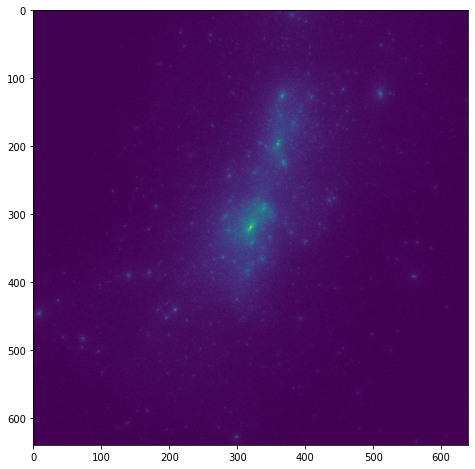

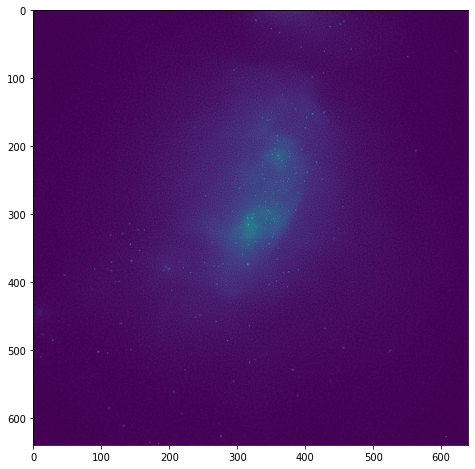

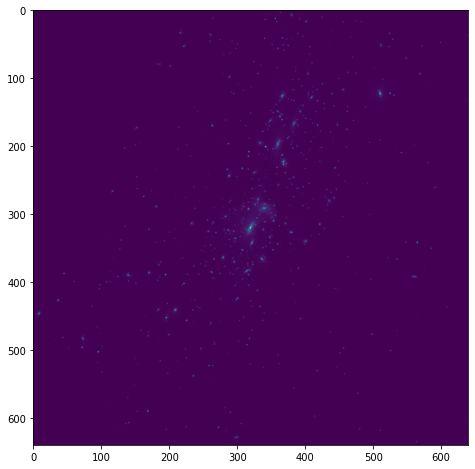

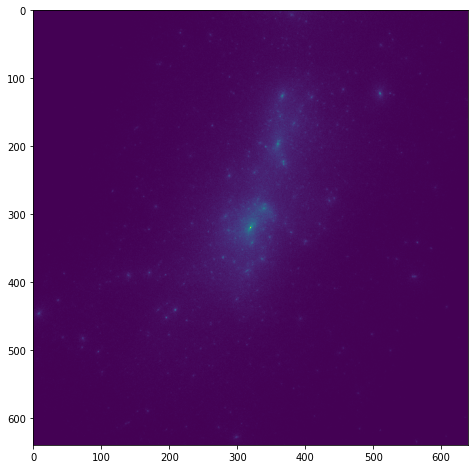

In [67]:
plt.figure(figsize=(8,8))
plt.imshow(dm)
plt.show()
plt.figure(figsize=(8,8))
plt.imshow(gas)
plt.show()
plt.figure(figsize=(8,8))
plt.imshow(np.log10(1+star))
plt.show()


plt.figure(figsize=(8,8))
plt.imshow(TotalM)
plt.show()

In [73]:
lp = 1
hid = 128000000000001
for RA in RAs:
    M = get_M(lp,hid,RA)
    dm = read_dm(lp,hid,RA)
    gas = read_gas(lp,hid,RA)
    star = read_star(lp,hid,RA)
    TotalM = dm+gas+star
    print((dm.sum()-(10**M/1e10))/(10**M/1e10))
    print((TotalM.sum()-(10**M/1e10))/(10**M/1e10))

0
0
0
0
-0.02285527141162407
0.1473580432436752
1
1
1
1
-0.01834484840895133
0.1519348557753586
2
2
2
2
-0.02285527141162407
0.1473580432436752
3
3
3
3
-0.01942289040335694
0.15071814896249008
4
4
4
4
-0.0216143597633874
0.14930105772252905
5
5
5
5
-0.004162100785608865
0.1693722180865319
6
6
6
6
-0.025931859783248346
0.14352448355298478
7
7
7
7
-0.029145627059736282
0.13935342794625633
8
8
8
8
-0.022711791002296706
0.14707695745103894
9
9
9
9
0.03485099808028181
0.21540721552689793
10
10
10
10
-0.0025028661872049116
0.17193526630518643
11
11
11
11
-0.009328364983619187
0.16331228292434438
12
12
12
12
-0.018527107307286093
0.15257337726171374
13
13
13
13
0.042914984869369795
0.22511998767396676
14
14
14
14
-0.013811643043986748
0.15816696455322005
15
15
15
15
-0.012691914173898191
0.16006506313942487
16
16
16
16
-0.020620660982572883
0.14905749348878958
17
17
17
17
0.024190306721036076
0.20423527820643708
18
18
18
18
0.04352138349122295
0.22655650188641632
19
19
19
19
0.048565495448859

38581.032494498824

In [43]:
dm.sum()
star.sum()
gas.sum()

41517.44520939374

In [9]:
def indices_inside(radius):
    radiusSquared = radius**2 
    indices = []
    width, height = dm.shape
    x1 = 320
    y1 = 320
    for x in range(width):
        for y in range(height):
            dx = x - x1
            dy = y - y1
            distanceSquared = dx*dx+dy*dy
            if (distanceSquared <= radiusSquared):
                indices.append((x,y))
                
    return indices
    

In [ ]:
plt.imshow(TotalM[indices_inside(320)])

In [ ]:
indices_inside